In [1]:
import pandas as pd
from pandas_datareader import data
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
fb = data.DataReader(name = "FB", data_source= "morningstar", start = "2015-01-01", end = "2017-6-30")

In [96]:
fb.head()

Close     High     Low   Open    Volume
Symbol Date                                               
FB     2015-01-01  78.02  78.0200  78.020  78.02         0
       2015-01-02  78.45  78.9300  77.700  78.58  18177475
       2015-01-05  77.19  79.2455  76.860  77.98  26452191
       2015-01-06  76.15  77.5900  75.365  77.23  27399288
       2015-01-07  76.15  77.3600  75.820  76.76  22045333

In [97]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 652 entries, (FB, 2015-01-01 00:00:00) to (FB, 2017-06-30 00:00:00)
Data columns (total 5 columns):
Close     652 non-null float64
High      652 non-null float64
Low       652 non-null float64
Open      652 non-null float64
Volume    652 non-null int64
dtypes: float64(4), int64(1)
memory usage: 32.6+ KB


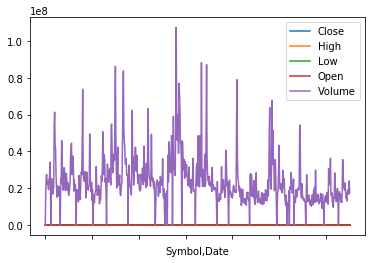

In [98]:
fb.plot()

In [99]:
# we don't need Symbol level of dataframe, so we can just drop that.

fb.index.droplevel(level = -1)

Index(['FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB',
       ...
       'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB', 'FB'],
      dtype='object', name='Symbol', length=652)

In [100]:
fb.index.droplevel(level = 0)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='Date', length=652, freq=None)

In [101]:
fb.index = fb.index.droplevel(level = 0)

In [102]:
fb.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,78.02,78.0200,78.020,78.02,0
2015-01-02,78.45,78.9300,77.700,78.58,18177475
2015-01-05,77.19,79.2455,76.860,77.98,26452191
2015-01-06,76.15,77.5900,75.365,77.23,27399288
2015-01-07,76.15,77.3600,75.820,76.76,22045333


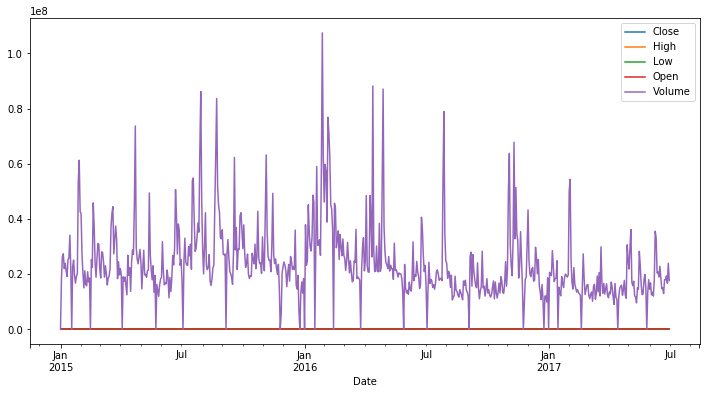

In [105]:
fb.plot(figsize= (12,6))

In [69]:
# suppose we want to analyze the closing price of facebook over this period of time i.e. whether the closing price
# was average one or not

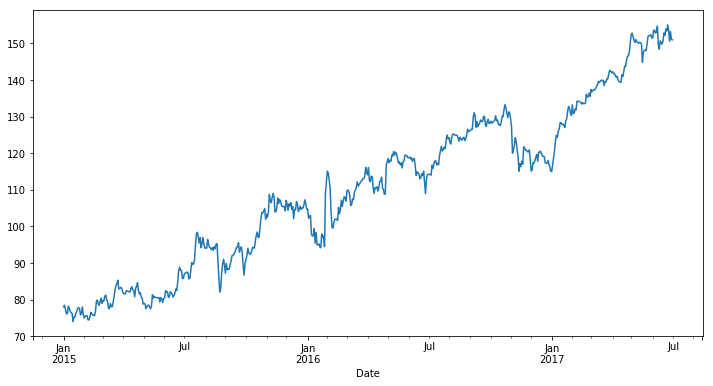

In [71]:
fb["Close"].plot(figsize = (12,6))

In [106]:
moving_avg = pd.rolling_mean(fb["Close"],window= 100)

/home/urvashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  """Entry point for launching an IPython kernel.


In [107]:
moving_avg.head()
moving_avg.tail()

Date
2017-06-26    144.0851
2017-06-27    144.2725
2017-06-28    144.4629
2017-06-29    144.6319
2017-06-30    144.7998
Name: Close, dtype: float64

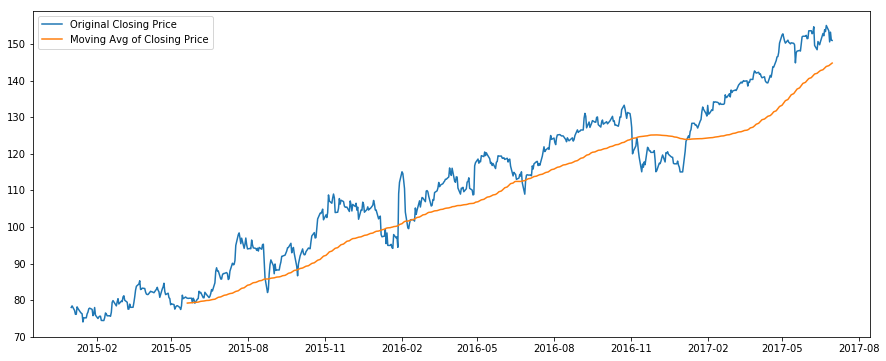

In [108]:
plt.figure(figsize=(15,6))
plt.plot(fb["Close"], label = "Original Closing Price")
plt.plot(moving_avg, label = "Moving Avg of Closing Price")
plt.legend()

In [86]:
# note that dates are not appearing with Month names. so we need to change the dates to datetime object

Text(0.5,1,'FACEBOOK CLOSING PRICE ANALYSIS')

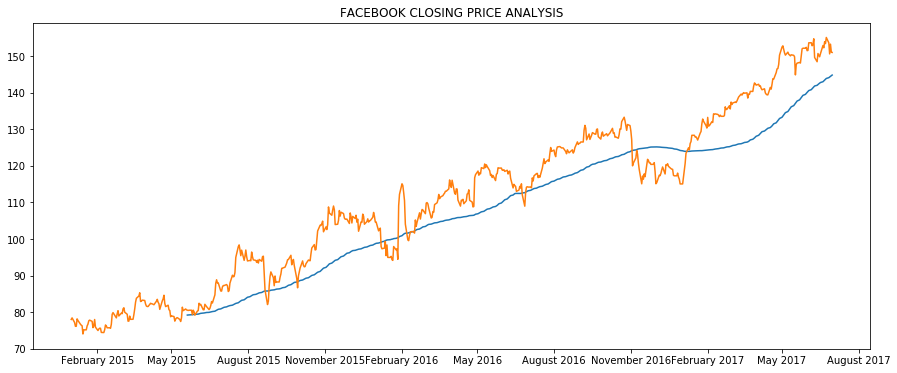

In [124]:
import matplotlib.dates as mdates
fig,ax = plt.subplots(ncols=1, nrows= 1, figsize = (15,6))
ax.plot(moving_avg)
ax.plot(fb["Close"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %Y"))
ax.set_title("FACEBOOK CLOSING PRICE ANALYSIS")

**Suppose we want to chnage how ticks appear i.e. we want to show them vertically instead**

Text(0.5,1,'FACEBOOK CLOSING PRICE ANALYSIS')

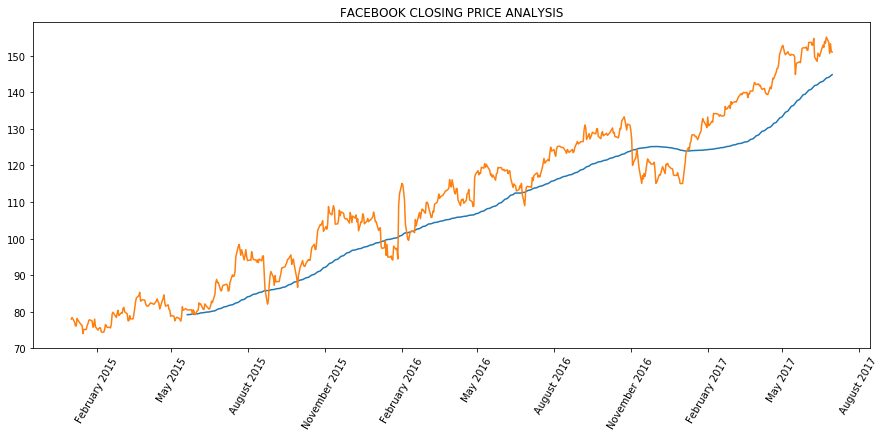

In [125]:
import matplotlib.dates as mdates
fig,ax = plt.subplots(ncols=1, nrows= 1, figsize = (15,6))
ax.plot(moving_avg)
ax.plot(fb["Close"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %Y"))
ax.xaxis.set_tick_params(rotation = 60)
ax.set_title("FACEBOOK CLOSING PRICE ANALYSIS")

### Quesn : Why did facebook closing stock prices fell below average during Nov 2016 and Feb 2017?

* During Nov 2016 , presidential electoion were going on, so the new president wasn't elected till Jan 2017. This is an important thing for financial investors
* During political uncertainity, investors sell lots of shares. Due to which FB's stock prices fell below 100 days
  moving avg during this time period.
* During this time, bulls i.e. people who like taking risks will invest more into facebook shares while bears will sell